In [22]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
data_id = 26
file_name = "result/par"+str(data_id)+".npy"
par = np.load(file=file_name)


file_name = "result/cov"+str(data_id)+".npy"
cov = np.load(file=file_name)

file_name = "result/true_par"+str(data_id)+".npy"
true_cov = np.load(file=file_name, allow_pickle=True)

exper_iter, optim_iter, data_dim = cov.shape[:3]
true_mean = 0; mean_vec = np.full(data_dim, true_mean)


In [1]:
import pandas as pd
pd.read_csv("./exper_result.csv")[-5:]

,0,6.4390,1000,0.1,2,0.0,6.0,0.0005,0.005,0.1 .1,10,1,1 .1,0.0 .1,2022-11-19,18:17
21,22,11.4990,10000,0.2,10,0.0,6.0,0.005,0.01,0.2,1,100,1,0.0,2022-11-28,10:03
22,23,2.7936,10000,0.2,10,0.0,0.5,0.005,0.01,0.2,10,20,1,0.0,2022-11-28,10:12
23,24,3.6633,10000,0.2,10,0.0,1.0,0.005,0.01,0.2,10,20,1,0.0,2022-11-28,10:18
24,25,10.6830,10000,0.2,10,0.0,6.0,0.005,0.01,0.2,10,20,1,0.0,2022-11-28,10:23
25,26,3.3673,10000,0.2,10,0.0,0.5,0.005,0.01,0.2,5,10,1,0.0,2022-11-28,10:32


In [10]:
def plot():
    cov_end = []
    
    for i in range(exper_iter):
        plt.subplots()
        loss_cov = LA.norm(cov[i] - true_cov[i], ord = 2, axis = (1,2))
        plt.plot(loss_cov)
        cov_end.append(loss_cov[-1])
    print("mean std : %.5f" %np.mean(cov_end))
    print("cov  std : %.5f" %np.std(cov_end))



mean std : 2.14110
cov  std : 0.26915


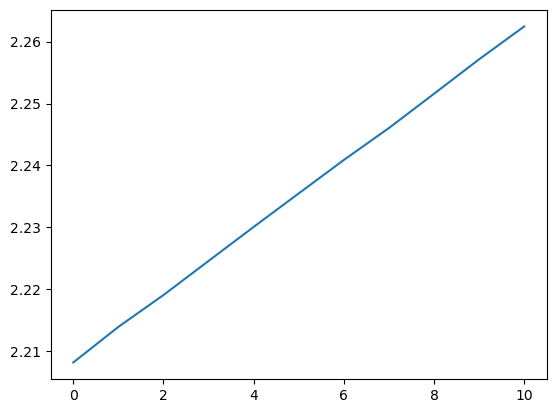

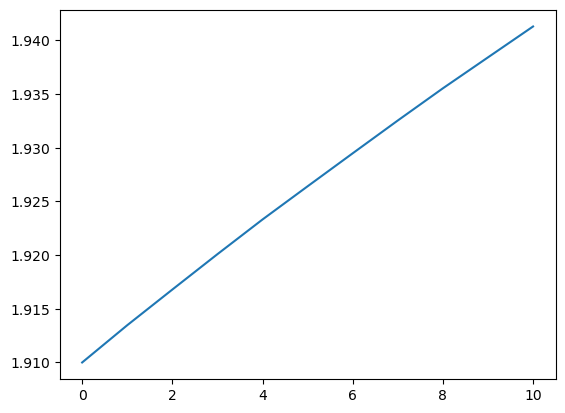

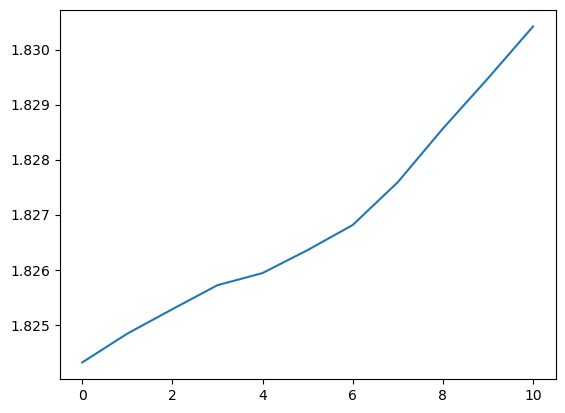

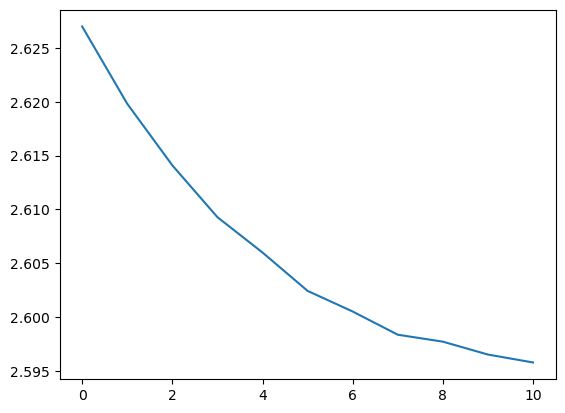

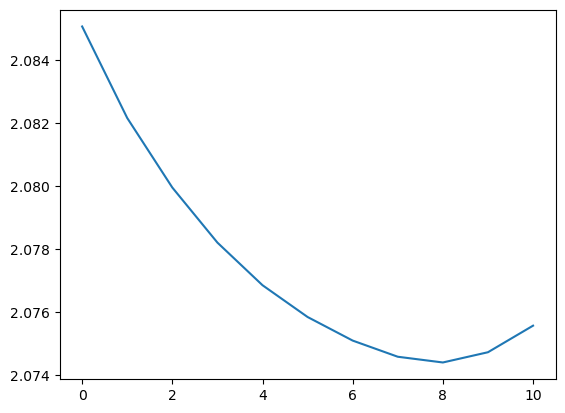

In [11]:
plot()

In [23]:
true_cov=true_cov[5:]

In [24]:
true_cov

array([array([[1.20970636, 0.68858253, 0.        , 0.        , 0.        ,
               0.        , 0.        , 0.        , 0.        , 0.        ],
              [0.68858253, 1.20970636, 0.        , 0.61628913, 0.        ,
               0.        , 0.        , 0.        , 0.63781383, 0.        ],
              [0.        , 0.        , 0.91312454, 0.        , 0.        ,
               0.        , 0.44813785, 0.        , 0.        , 0.        ],
              [0.        , 0.61628913, 0.        , 0.05      , 0.49390403,
               0.        , 0.        , 0.        , 0.        , 0.        ],
              [0.        , 0.        , 0.        , 0.49390403, 0.44973369,
               0.        , 0.        , 0.        , 0.        , 0.        ],
              [0.        , 0.        , 0.        , 0.        , 0.        ,
               0.78618557, 0.        , 0.        , 0.        , 0.        ],
              [0.        , 0.        , 0.44813785, 0.        , 0.        ,
               0.  

/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


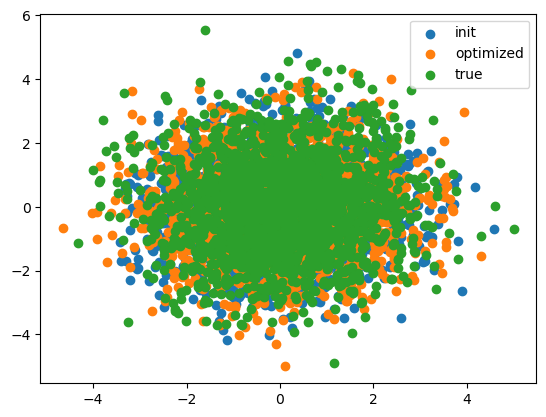

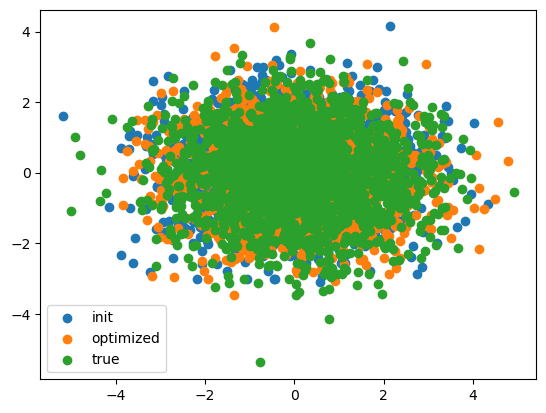

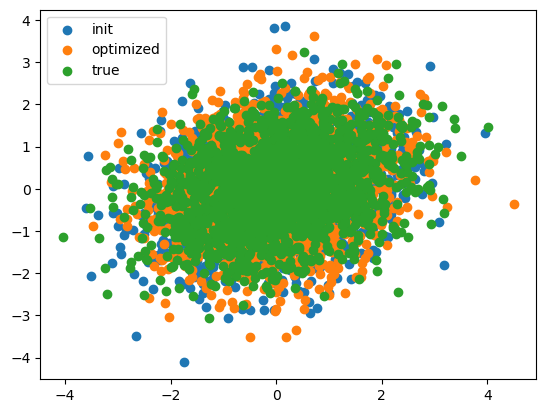

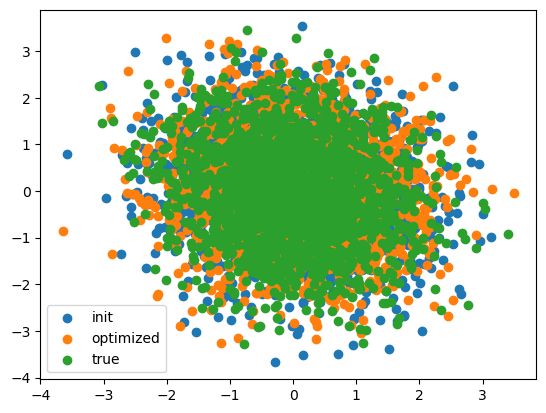

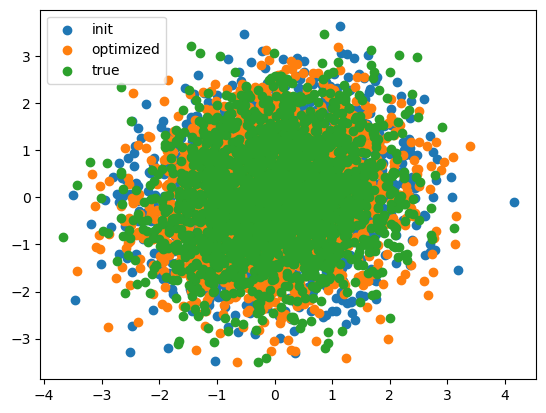

In [34]:
i=0
size=2000
for i in [3]:
    for j in range(int(data_dim/2)):
        plt.subplots()
        d1 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][0], size=size)
        d2 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][-1], size=size)
        d3 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=true_cov[i], size=size)
        plt.scatter(d1[:,j], d1[:,j+1], label="init")
        plt.scatter(d2[:,j], d2[:,j+1], label="optimized")
        plt.scatter(d3[:,j], d3[:,j+1], label="true")
        plt.legend()

In [37]:
import seaborn as sns

In [46]:
cov = np.round(cov, decimals=2)
true_cov = np.round(true_cov, decimals=2)

TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable rint method

<AxesSubplot:>

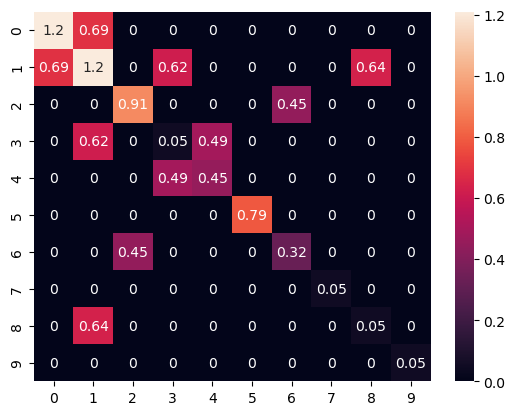

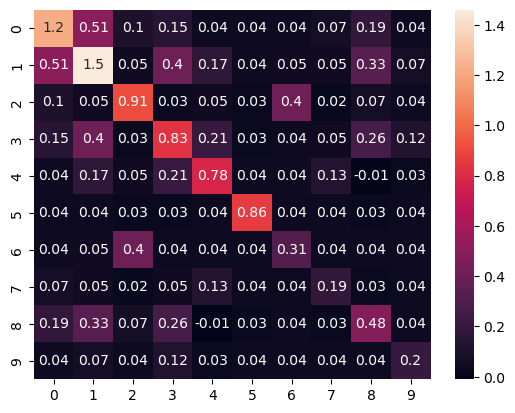

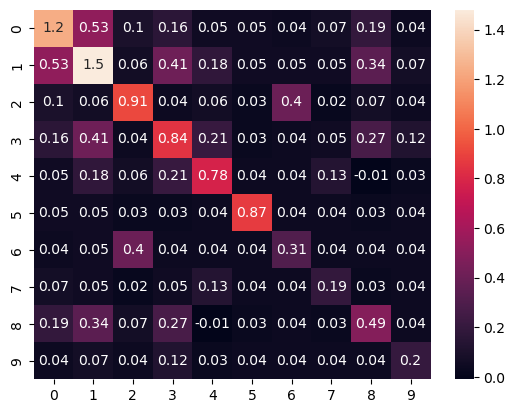

In [47]:
sns.heatmap(true_cov[0], annot=True)
plt.subplots()
sns.heatmap(cov[0][0], annot=True)
plt.subplots()
sns.heatmap(cov[0][-1], annot=True)

In [36]:
true_cov[0], cov[0][0], cov[0][-1]

(array([[1.20970636, 0.68858253, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.68858253, 1.20970636, 0.        , 0.61628913, 0.        ,
         0.        , 0.        , 0.        , 0.63781383, 0.        ],
        [0.        , 0.        , 0.91312454, 0.        , 0.        ,
         0.        , 0.44813785, 0.        , 0.        , 0.        ],
        [0.        , 0.61628913, 0.        , 0.05      , 0.49390403,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.49390403, 0.44973369,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.78618557, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.44813785, 0.        , 0.        ,
         0.        , 0.32279472, 0.        , 0.        , 0.        ],
        [0.        , 0.    

/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


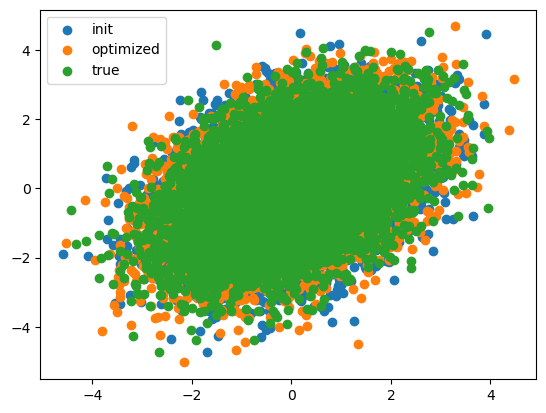

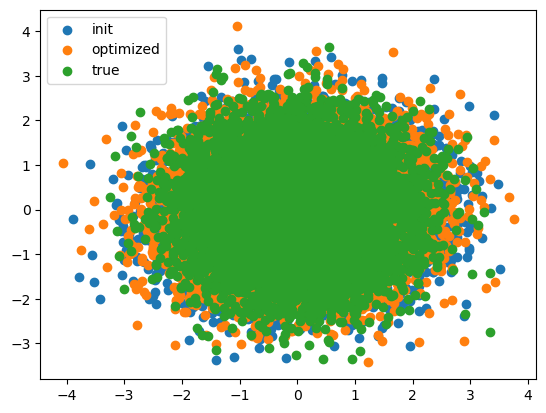

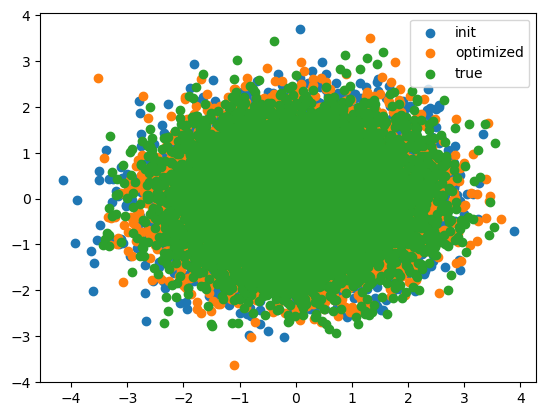

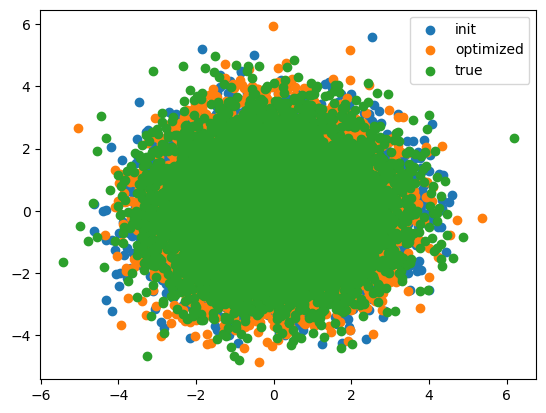

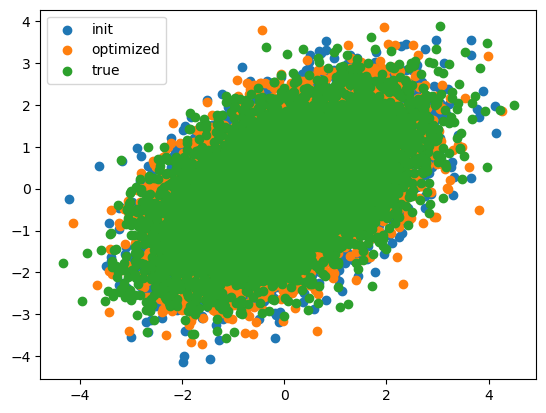

In [33]:
i=4
size=10000
for i in range(exper_iter):
    plt.subplots()
    d1 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][0], size=size)
    d2 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][-1], size=size)
    d3 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=true_cov[i], size=size)
    plt.scatter(d1[:,0], d1[:,1], label="init")
    plt.scatter(d2[:,0], d2[:,1], label="optimized")
    plt.scatter(d3[:,0], d3[:,1], label="true")
    plt.legend()